# Final Evaluation of the models

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import json
from prophet import Prophet
import pandas as pd

import sys
sys.path.insert(0, "../Src/")
import loadData
import trainModel as tm
import visualization as viz

%autosave 5

Autosaving every 5 seconds


Autosaving every 5 seconds


Autosaving every 5 seconds


In [2]:
data = loadData.loadData('MSFT')


[*********************100%***********************]  1 of 1 completed


## Autoregression

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


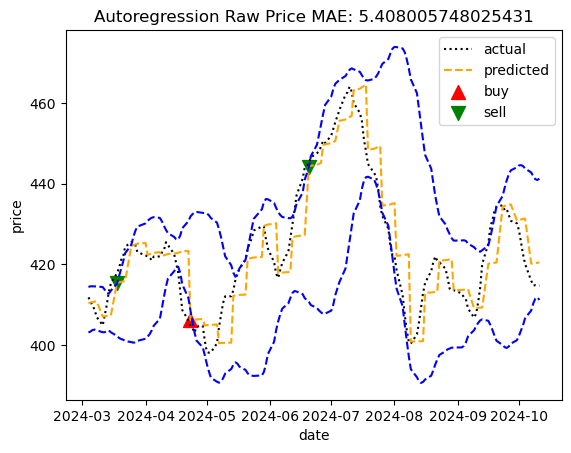

<Figure size 640x480 with 0 Axes>

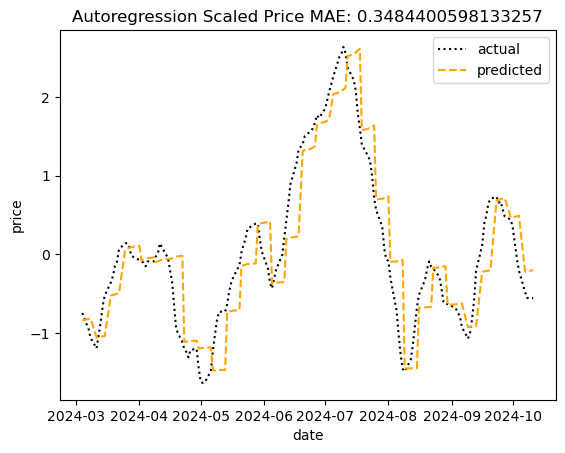

<Figure size 640x480 with 0 Axes>

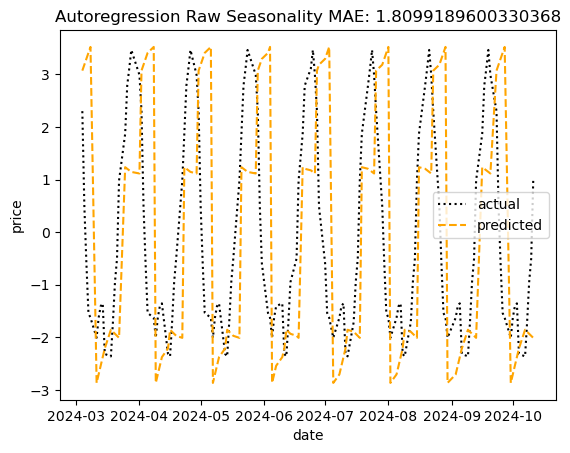

<Figure size 640x480 with 0 Axes>

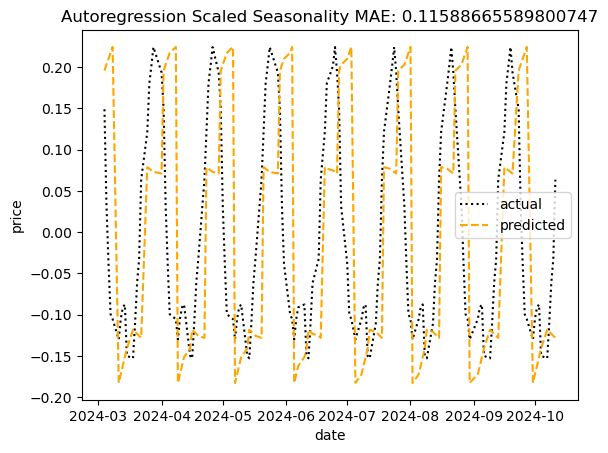

<Figure size 640x480 with 0 Axes>

In [3]:
viz.compareSimplePickleModel(data, 'Autoregression','ar_params')

## ARIMA

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


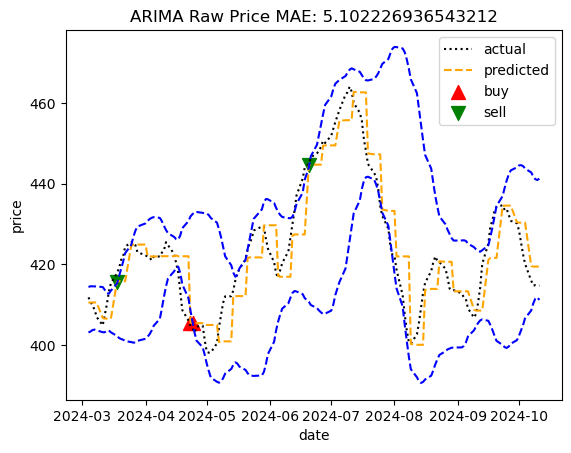

<Figure size 640x480 with 0 Axes>

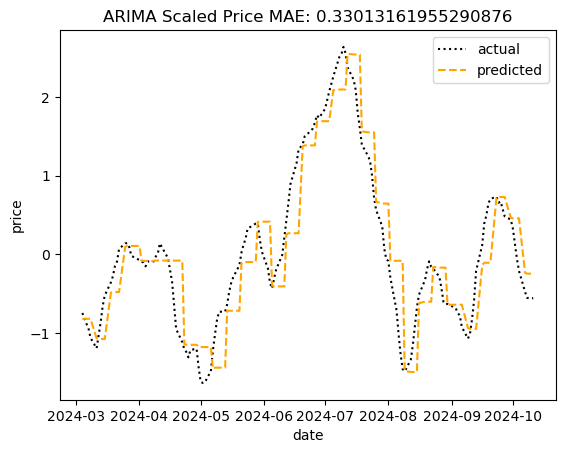

<Figure size 640x480 with 0 Axes>

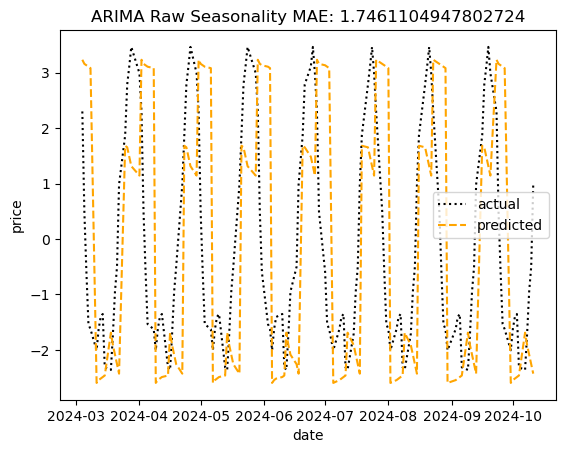

<Figure size 640x480 with 0 Axes>

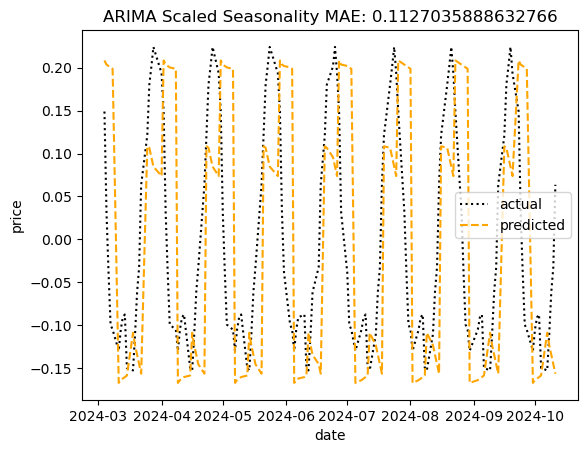

<Figure size 640x480 with 0 Axes>

In [4]:
viz.compareSimplePickleModel(data, 'ARIMA','arima_params')

## SARIMA

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


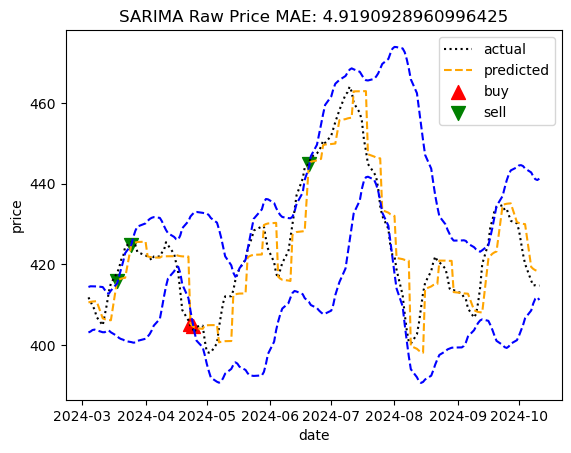

<Figure size 640x480 with 0 Axes>

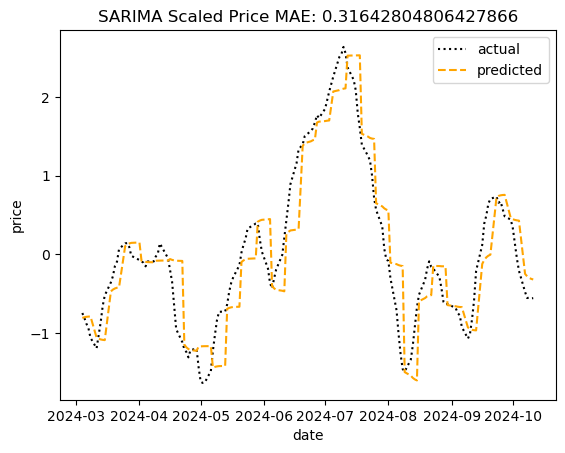

<Figure size 640x480 with 0 Axes>

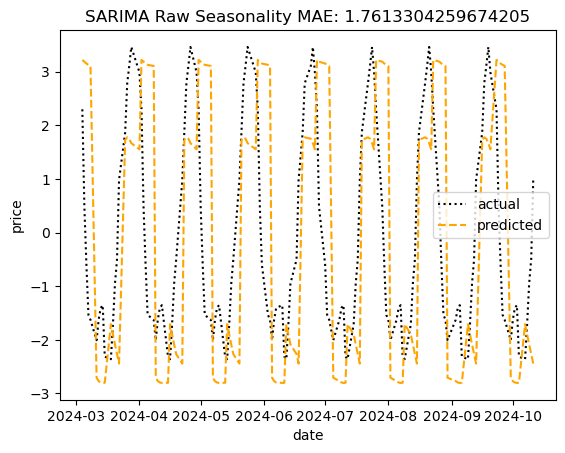

<Figure size 640x480 with 0 Axes>

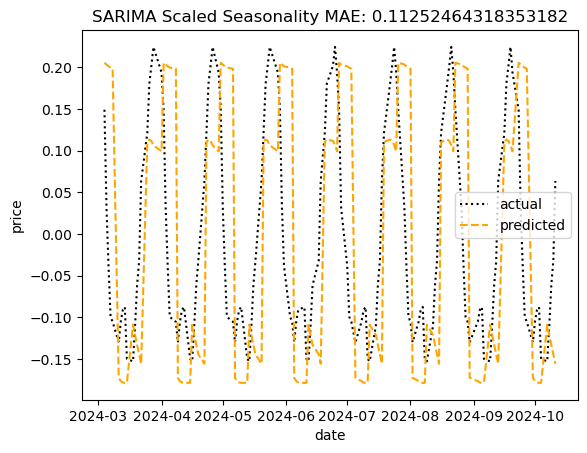

<Figure size 640x480 with 0 Axes>

In [5]:
viz.compareSimplePickleModel(data,'SARIMA')

## ExponentialSmoothing

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


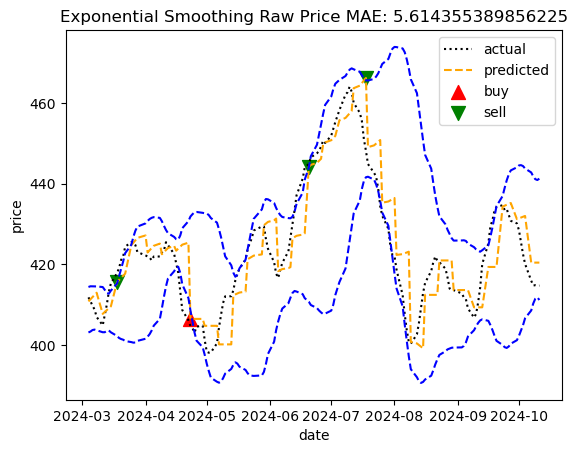

<Figure size 640x480 with 0 Axes>

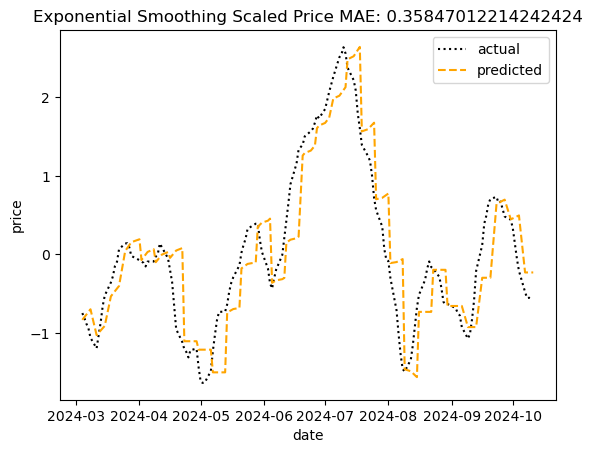

<Figure size 640x480 with 0 Axes>

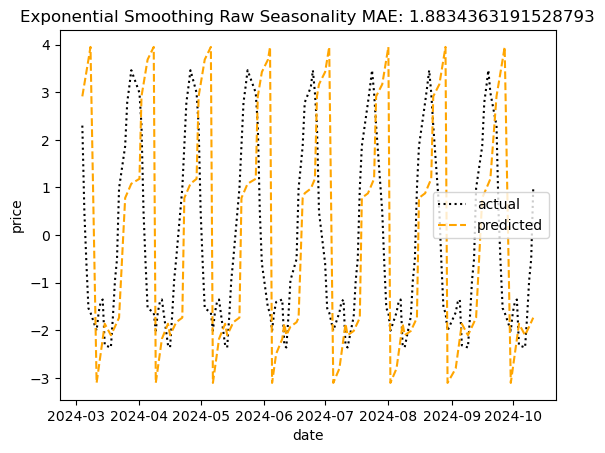

<Figure size 640x480 with 0 Axes>

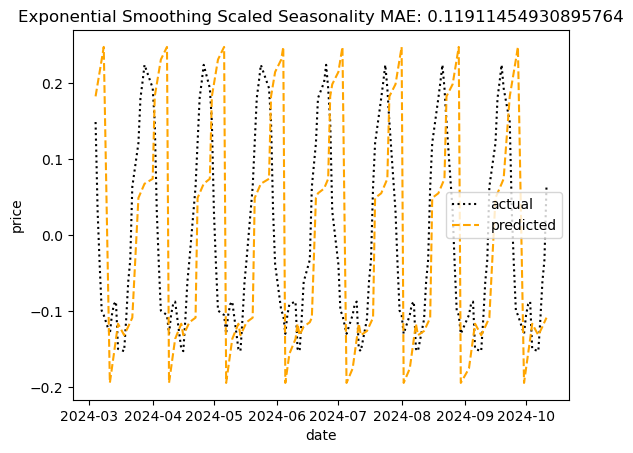

<Figure size 640x480 with 0 Axes>

In [6]:
viz.compareSimplePickleModel(data,'Exponential Smoothing','exponentialSmoothing_params')

## Prophet

00:31:51 - cmdstanpy - INFO - Chain [1] start processing
00:31:51 - cmdstanpy - INFO - Chain [1] done processing
00:31:52 - cmdstanpy - INFO - Chain [1] start processing
00:31:52 - cmdstanpy - INFO - Chain [1] done processing
00:31:52 - cmdstanpy - INFO - Chain [1] start processing
00:31:52 - cmdstanpy - INFO - Chain [1] done processing
00:31:52 - cmdstanpy - INFO - Chain [1] start processing
00:31:52 - cmdstanpy - INFO - Chain [1] done processing
00:31:53 - cmdstanpy - INFO - Chain [1] start processing
00:31:53 - cmdstanpy - INFO - Chain [1] done processing
00:31:53 - cmdstanpy - INFO - Chain [1] start processing
00:31:53 - cmdstanpy - INFO - Chain [1] done processing
00:31:54 - cmdstanpy - INFO - Chain [1] start processing
00:31:54 - cmdstanpy - INFO - Chain [1] done processing
00:31:54 - cmdstanpy - INFO - Chain [1] start processing
00:31:54 - cmdstanpy - INFO - Chain [1] done processing
00:31:54 - cmdstanpy - INFO - Chain [1] start processing
00:31:54 - cmdstanpy - INFO - Chain [1]

(365.9097842181013, 500.25996719962086)

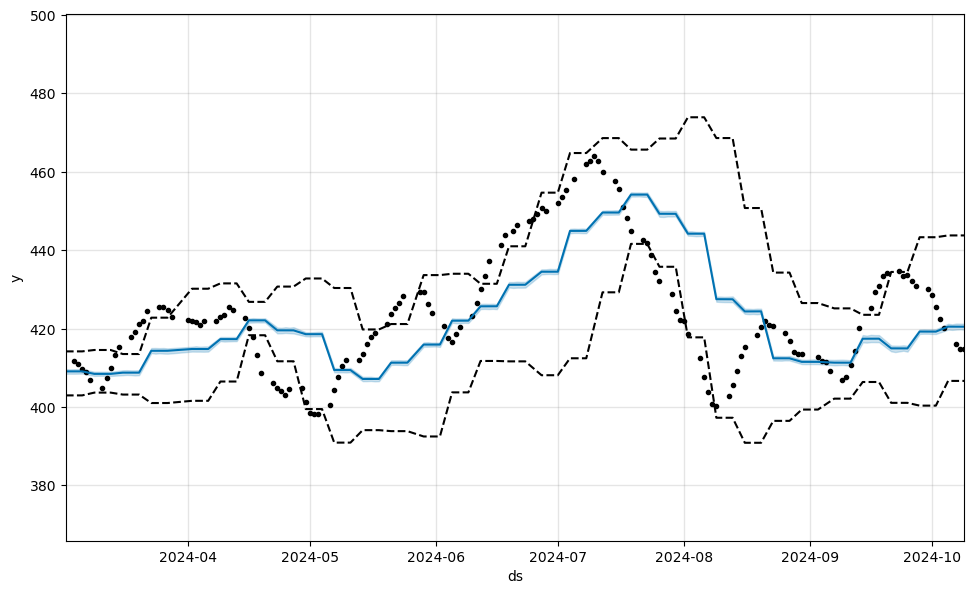

In [7]:
train,validation = loadData.splitData(data)
with open('../Models/prophet_params.json') as f:
    params = json.load(f)
fullPredict, forecast = tm.makeFullProphetPrediction(params,train,data,periods = 5)
model = Prophet(**params)
model.fit(data)

forecast = forecast.loc[:, ~forecast.columns.duplicated()]
forecast['ds'] = pd.to_datetime(forecast['ds'])
future_forecast = forecast[forecast['ds'] > train['ds'].max()]

fig = model.plot(forecast, xlabel = 'ds', ylabel = 'y')
ax = fig.gca()  # Get current axes
ax.set_xlim([future_forecast['ds'].min(), future_forecast['ds'].max()])
ax.set_ylim([0.90*future_forecast['yhat_lower'].min(), 1.1*future_forecast['yhat_upper'].max()])



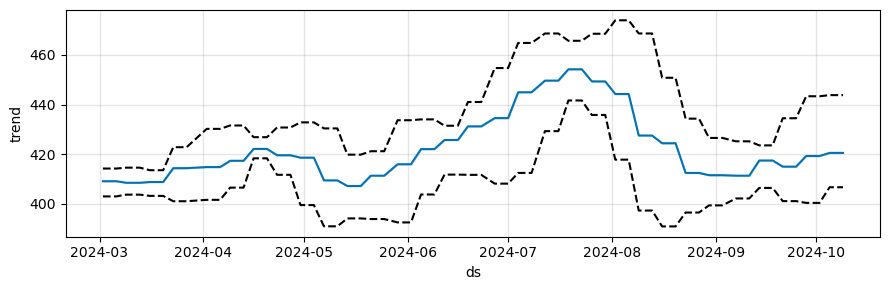

In [8]:
fig = model.plot_components(forecast)

0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


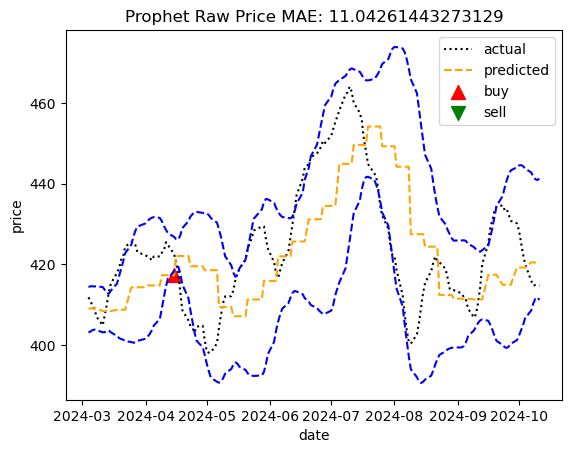

<Figure size 640x480 with 0 Axes>

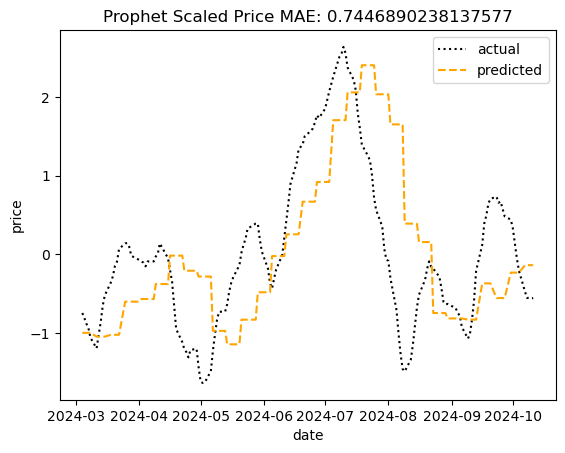

<Figure size 640x480 with 0 Axes>

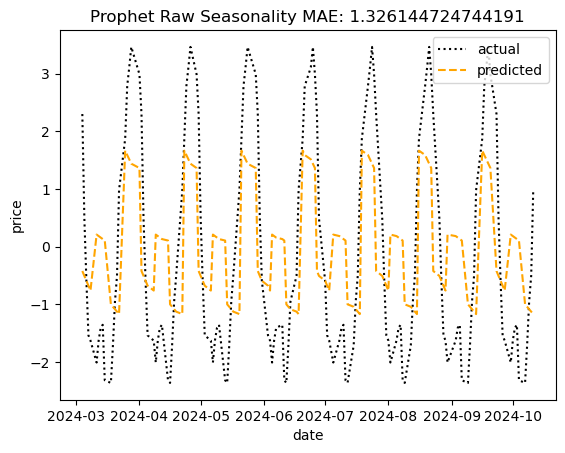

<Figure size 640x480 with 0 Axes>

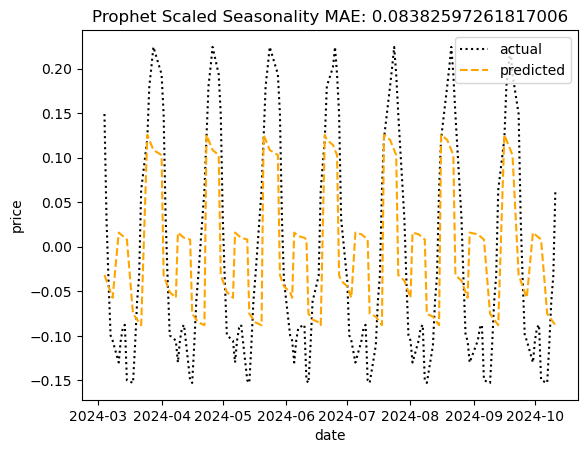

<Figure size 640x480 with 0 Axes>

In [9]:
viz.compare(validation,fullPredict,'Prophet')

## LSTM

2025-01-20 00:32:05.419678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-20 00:32:05.420423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-20 00:32:05.420870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 0s 4ms/step
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


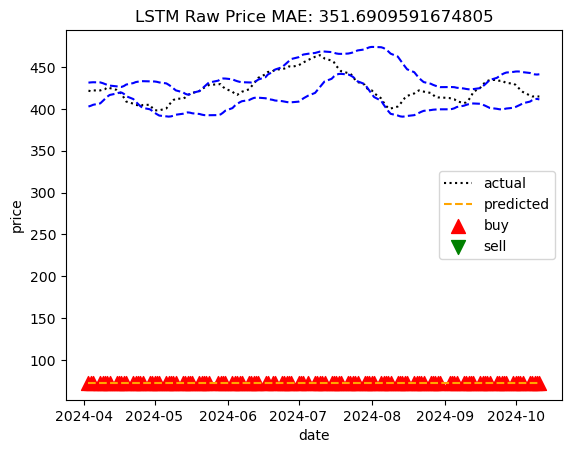

<Figure size 640x480 with 0 Axes>

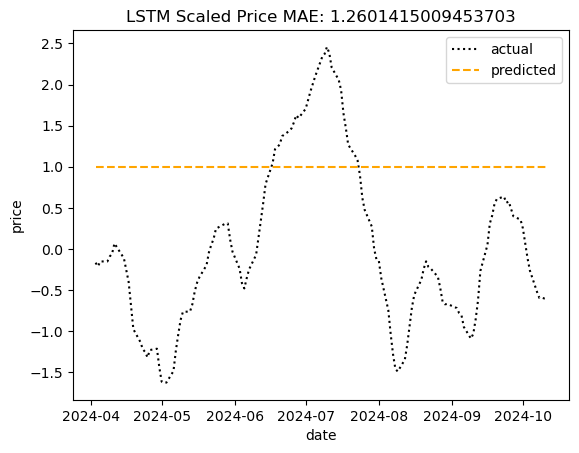

<Figure size 640x480 with 0 Axes>

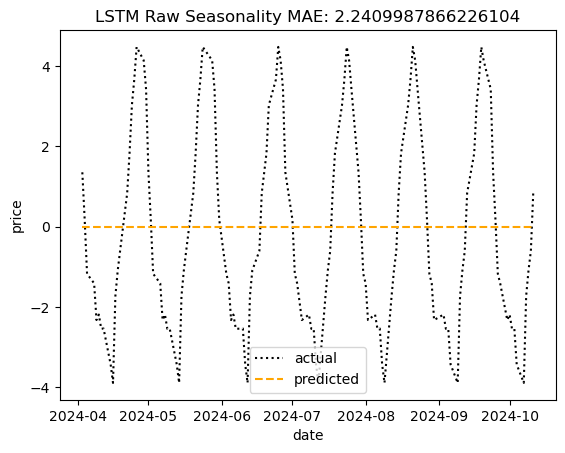

<Figure size 640x480 with 0 Axes>

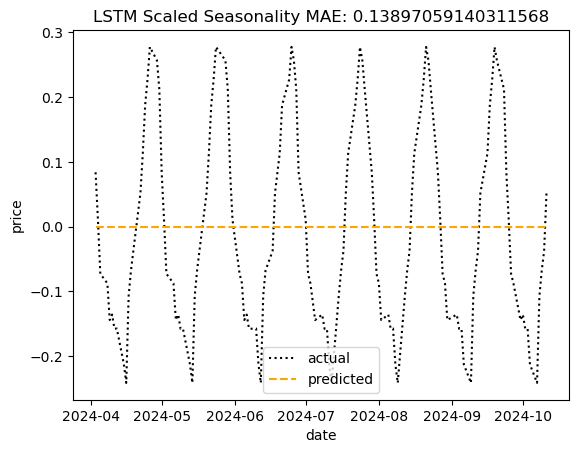

<Figure size 640x480 with 0 Axes>

In [10]:
train,test = loadData.splitData(data)
model = keras.models.load_model('../Models/LSTM_.h5')
XTest, yTest = loadData.processDataForLSTM(test['y'])
yPredict = model.predict(XTest)

viz.compare(data, np.array(yPredict).reshape(-1,) ,'LSTM')